# Predicting which Passenger Survived the titanic

This project is binary classification problem, where the passenger either survived (`1`) or died (`0`). Here is a list of the columns of the dataset:

* `PassengerID` - Unique ID for each column
* `Survived` - Whether the passenger survived (`1`) or not (`0`)
* `Pclass` - Class of the passenger's ticket. Either 1, 2 or 3.
* `Sex` - Passenger's sex (male or female)
* `Age` - Passenger's age
* `Sibsp` - Number of sibling or spouses aboard the Titanic
* `Parch` - Number of parents or children aboard the Titanic
* `Ticket` - Passenger's ticket number
* `Fare` - The price paid for the passenger's ticket
* `Cabin` - Passenger's cabin number
* `Embarked` - Port where the passenger embarked. Can be:
    * `C` - Cherbourg
    * `Q` - Queenstown
    * `S` - Southampton

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading data

In [2]:
titanic_data = pd.read_csv('train.csv')
holdout = pd.read_csv("test.csv")

In [3]:
titanic_data.shape

(891, 12)

In [4]:
holdout.shape

(418, 11)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [9]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
print("age",titanic_data.Age.isna().sum())
print("cabin",titanic_data.Cabin.isna().sum())
print("embark",titanic_data.Embarked.isna().sum())

age 177
cabin 687
embark 2


## Exploration of survial rate

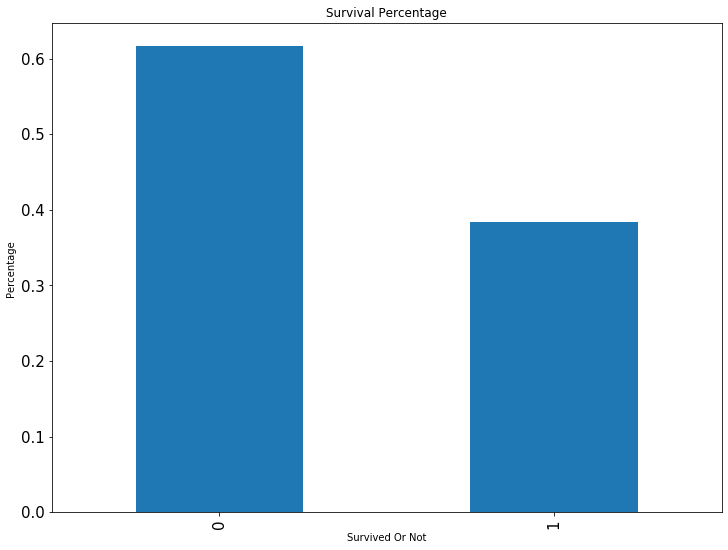

In [11]:
plt.figure(figsize=(12,9))
titanic_data['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Survived Or Not')
plt.ylabel('Percentage ')
plt.title("Survival Percentage")
plt.show()

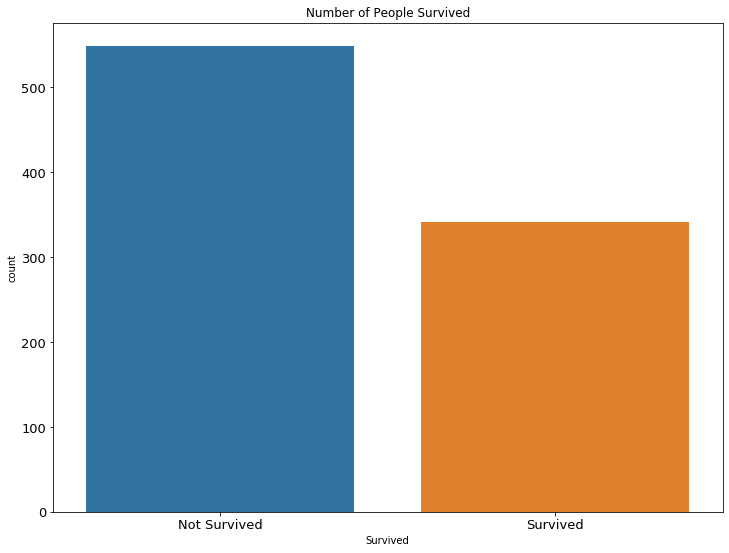

In [12]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived',data=titanic_data)
label=['Not Survived','Survived']
plt.xticks(titanic_data['Survived'].unique(), label, size=13)
plt.yticks(size=13)
plt.title("Number of People Survived")
plt.show()

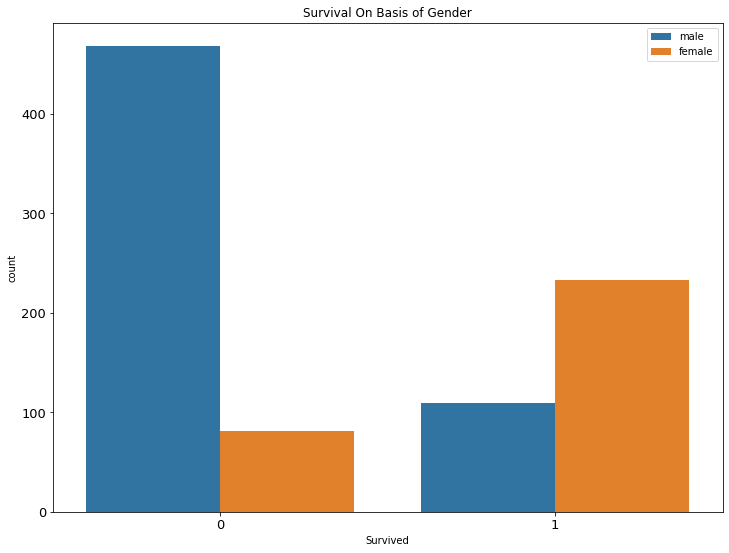

In [13]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived',hue='Sex',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Gender")
plt.legend(loc='best')
plt.show()

 0 means not survived and 1 means survived

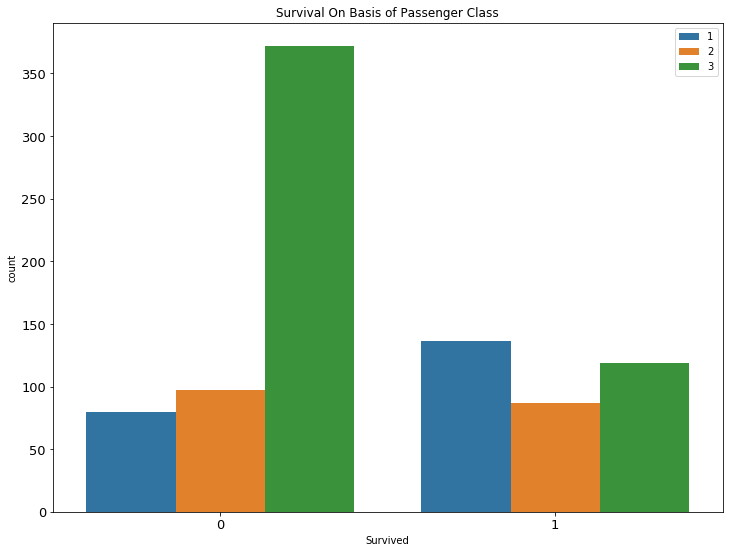

In [14]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Passenger Class")
plt.legend(loc='best')
plt.show()

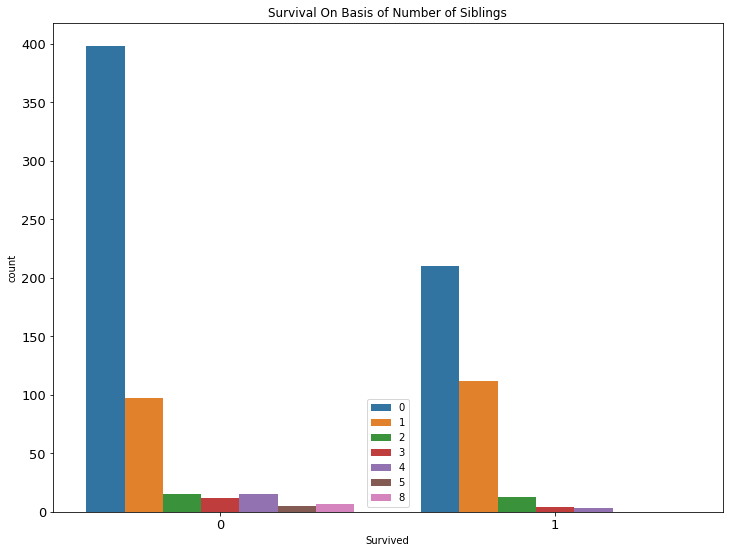

In [15]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived',hue='SibSp',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Number of Siblings")
plt.legend(loc='best')
plt.show()

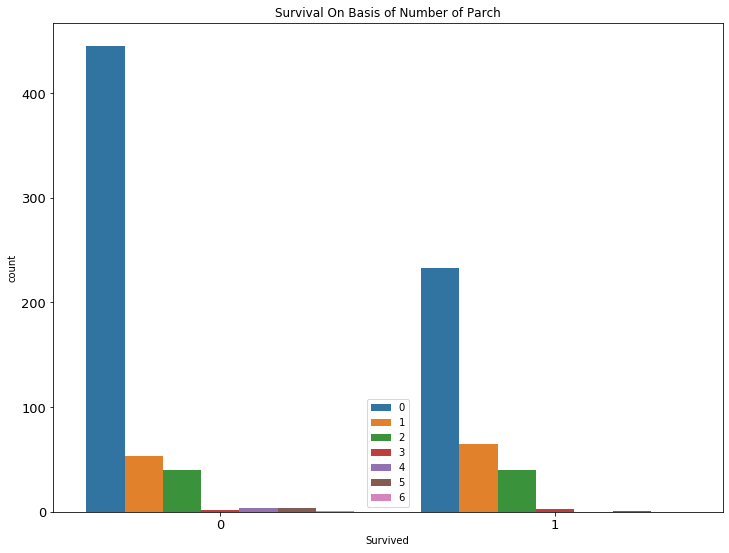

In [16]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived',hue='Parch',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Number of Parch")
plt.legend(loc='best')
plt.show()

#### Observation
Female people, 1st class people and people with no siblings has more chances of survival

## Turn age into a category

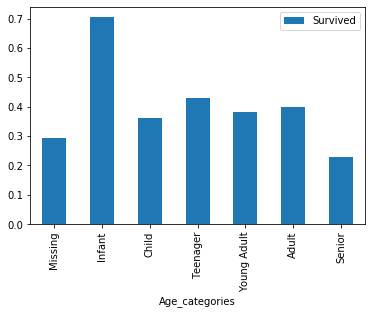

In [17]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

titanic_data = process_age(titanic_data,cut_points,label_names)
holdout = process_age(holdout,cut_points,label_names)

pivot = titanic_data.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

## Creating Dumpies

In [18]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

titanic_data = create_dummies(titanic_data,"Pclass")
holdout = create_dummies(holdout,"Pclass")
titanic_data = create_dummies(titanic_data,"Sex")
holdout = create_dummies(holdout,"Sex")
titanic_data= create_dummies(titanic_data,"Age_categories")
holdout = create_dummies(holdout,"Age_categories")

In [19]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


## Spliting Data

In [20]:
from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

X = titanic_data[columns]
y = titanic_data['Survived']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.8100558659217877


## Cross-validation to avoid overfitting

In [22]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv = 10)
accuracy = np.mean(scores)
print(accuracy)

0.8024719101123596


## Feature selection

Now, we will try other features in order to improve the accuracy score.

In [23]:
from sklearn.preprocessing import minmax_scale

holdout["Fare"] = holdout["Fare"].fillna(titanic_data["Fare"].mean())
titanic_data['Embarked'] = titanic_data['Embarked'].fillna('S')
holdout['Embarked'] = holdout['Embarked'].fillna('S')
titanic_data = create_dummies(titanic_data, 'Embarked')
holdout = create_dummies(holdout, 'Embarked')
cols = ['SibSp', 'Parch', 'Fare']

for col in cols:
    titanic_data[col + "_scaled"] = minmax_scale(titanic_data[col])
    holdout[col + "_scaled"] = minmax_scale(holdout[col])

## Assess feature relevance

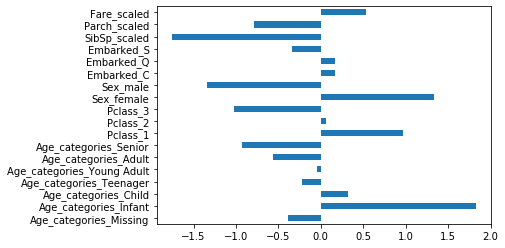

In [24]:
columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled']

lr = LogisticRegression()
lr.fit(titanic_data[columns], titanic_data['Survived'])
coefficients = lr.coef_
feature_importance = pd.Series(coefficients[0], index = titanic_data[columns].columns)

feature_importance.plot.barh()
plt.show()

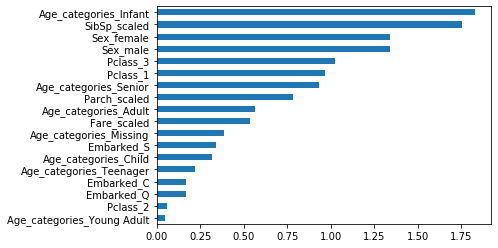

In [25]:
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()

Using the absolute value and ordering them gives us a better overview of each fearure's relevance.

In [26]:
columns = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']

X = titanic_data[columns]
y = titanic_data['Survived']

lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv = 10)
accuracy = np.mean(scores)
print(accuracy) 

0.8148064918851435


#### Observation 
There is a small increase in accuracy

## Feature binning on *fare*

In [27]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df,cut_points,label_names):
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

cut_points = [0,12,50,100,1000]
label_names = ["0-12","12-50","50-100","100+"]
titanic_data = process_fare(titanic_data,cut_points,label_names)
holdout = process_fare(holdout,cut_points,label_names)
titanic_data = create_dummies(titanic_data,"Fare_categories")
holdout = create_dummies(holdout,"Fare_categories")

## Create dummies for *Title* and *Cabin*

In [28]:
titles = {
    "Mr" :         "Mr",
    "Mme":         "Mrs",
    "Ms":          "Mrs",
    "Mrs" :        "Mrs",
    "Master" :     "Master",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "Capt":        "Officer",
    "Col":         "Officer",
    "Major":       "Officer",
    "Dr":          "Officer",
    "Rev":         "Officer",
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",
    "Countess":    "Royalty",
    "Dona":        "Royalty",
    "Lady" :       "Royalty"
}

extracted_titles = titanic_data["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
titanic_data["Title"] = extracted_titles.map(titles)

holdout_extracted_titles = holdout['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
holdout['Title'] = holdout_extracted_titles.map(titles)

titanic_data['Cabin_type'] = titanic_data['Cabin'].str[0]
titanic_data['Cabin_type'] = titanic_data['Cabin_type'].fillna('Unknown')

holdout['Cabin_type'] = holdout['Cabin'].str[0]
holdout['Cabin_type'] = holdout['Cabin_type'].fillna('Unknown')

for col in ['Title', 'Cabin_type']:
    titanic_data = create_dummies(titanic_data, col)
    holdout = create_dummies(holdout, col)

## Generate a heatmap for collinearity

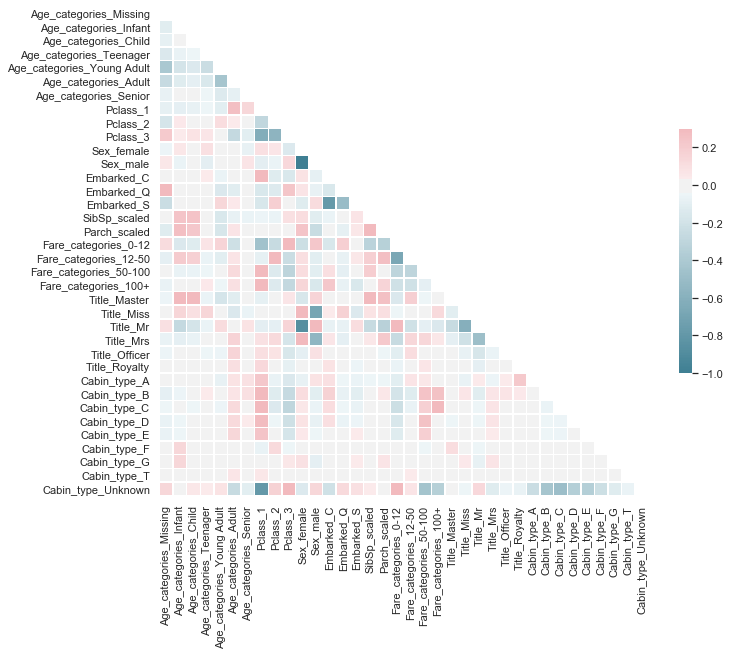

In [29]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_categories_0-12',
       'Fare_categories_12-50','Fare_categories_50-100', 'Fare_categories_100+',
       'Title_Master', 'Title_Miss', 'Title_Mr','Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Cabin_type_A','Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E','Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T', 'Cabin_type_Unknown']

plot_correlation_heatmap(titanic_data[columns])

## Use recursive feature elimination with cross-validation

In [30]:
from sklearn.feature_selection import RFECV

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_categories_0-12', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_T', 'Cabin_type_Unknown']

X = titanic_data[columns]
y = titanic_data["Survived"]

lr = LogisticRegression()
selector = RFECV(lr, cv = 10)
selector.fit(X, y)

optimized_columns = X.columns[selector.support_]

X = titanic_data[optimized_columns]
y = titanic_data["Survived"]

lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv = 10)
accuracy = np.mean(scores)

print(accuracy)

0.8226591760299625


In [31]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   PassengerId                 891 non-null    int64   
 1   Survived                    891 non-null    int64   
 2   Pclass                      891 non-null    int64   
 3   Name                        891 non-null    object  
 4   Sex                         891 non-null    object  
 5   Age                         891 non-null    float64 
 6   SibSp                       891 non-null    int64   
 7   Parch                       891 non-null    int64   
 8   Ticket                      891 non-null    object  
 9   Fare                        891 non-null    float64 
 10  Cabin                       204 non-null    object  
 11  Embarked                    891 non-null    object  
 12  Age_categories              891 non-null    category
 13  Pclass_1            

In [32]:
titanic_data_modified = pd.read_csv('train_modified.csv')
holdout = pd.read_csv('holdout_modified.csv')

In [33]:
titanic_data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Survived                    891 non-null    int64  
 1   PassengerId                 891 non-null    int64  
 2   Age_categories_Missing      891 non-null    int64  
 3   Age_categories_Infant       891 non-null    int64  
 4   Age_categories_Child        891 non-null    int64  
 5   Age_categories_Teenager     891 non-null    int64  
 6   Age_categories_Young Adult  891 non-null    int64  
 7   Age_categories_Adult        891 non-null    int64  
 8   Age_categories_Senior       891 non-null    int64  
 9   Pclass_1                    891 non-null    int64  
 10  Pclass_2                    891 non-null    int64  
 11  Pclass_3                    891 non-null    int64  
 12  Sex_female                  891 non-null    int64  
 13  Sex_male                    891 non

# Model selection and tuning

### Logistic regression accuracy score

In [34]:
X = titanic_data_modified.drop(['Survived','PassengerId'],axis=1)
y = titanic_data_modified['Survived']

lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv = 10)
accuracy_lr = scores.mean()

print(accuracy_lr)

0.8249812734082397


### K-nearest neighbours accuracy score

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
scores = cross_val_score(knn, X, y, cv = 10)
accuracy_knn = scores.mean()

print(accuracy_knn)

0.7833832709113608


### Hyperparameter optimization on k-nearest neighbours

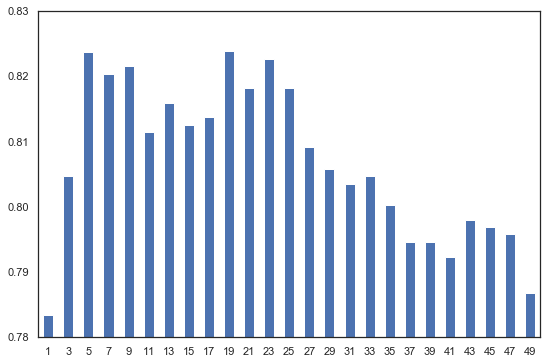

In [36]:
def plot_dict(dictionary):
    pd.Series(dictionary).plot.bar(figsize=(9,6),
                                   ylim=(0.78,0.83),rot=0)
    plt.show()

knn_scores = dict()

for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv = 10)
    accuracy_knn = scores.mean()
    knn_scores[k] = accuracy_knn
    
plot_dict(knn_scores)

#### Observation
k at 19 gives the best result

### Use grid search for model selection

In [37]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = hyperparameters, cv = 10)
grid.fit(X,y)

best_params = grid.best_params_
best_score = grid.best_score_

print(best_params)
print(best_score)

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.8293882646691635


### Random forest classifier score

In [38]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state = 1)
scores = cross_val_score(clf, X, y, cv = 10)
accuracy_rf = scores.mean()

print(accuracy_rf)

0.8204119850187267


In [39]:
clf = RandomForestClassifier(random_state = 1)

hyperparameters = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [5, 10],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [1, 5],
    'min_samples_split': [3, 5],
    'n_estimators': [6, 9]
}

grid = GridSearchCV(clf, param_grid = hyperparameters, cv = 10)
grid.fit(X, y)

best_params = grid.best_params_
best_score = grid.best_score_

print(best_params)
print(best_score)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 6}
0.838414481897628


## Observation
Random forest is better than the k-nearest neighbour model, but less accurate than the logistic regression.